# 分布シフト

`Section 04: Key Researches Based on Non-Diffusion Models` の `Lecture 12: About CLIP (Contrastive Language-Image Pre-training)` にて紹介した分布シフトを示す図の描画方法について紹介します。

分布シフト (distribution shift) は機械学習システムにとって大きな問題となる現象です。この現象は、モデルが学習対象としたデータの分布が時間の経過とともに変化することで発生します。従って時間が経つにつれてモデルの予測性能が低下していくことは避けられません。

分布シフトは必ず起こります。このような現象を早期発見してモデルを再構築すべきですが、発生条件は多くの要因に左右されるため、発見することは難しいです。いつのかにか分布シフトが起こっており、いつのまにか予測モデルの性能が落ちていた、ということが頻繁に起こります。

こうした背景を踏まえて、分布シフトに頑健なモデルの研究が進んでいます。先行研究ではマルチメディアに対する分布シフトの対策が進んでいます [[Wang+ MM'21]](https://dl.acm.org/doi/10.1145/3474085.3478876)。更に [`torchdrift`](https://github.com/torchdrift/torchdrift/) と呼ばれる pytorch のライブラリも開発されています。

講義内では CLIP [[Radford+ ICML'21]](https://arxiv.org/abs/2103.00020) が未知のデータにも頑健で、分布シフトにも強いことが様々な面で検証されていることを説明しました。

## 分布シフト状態の可視化

今回は分布シフトの一例として、モデルの訓練データ（これまで観測されてきた既知のデータ）とテストデータ（学習後に観測された未知のデータ）において、ズレが生じている状態を擬似的に可視化してみます。

まずは必要なライブラリをインポートします。

In [1]:
import numpy as np
import pandas as pd

分布シフト状態のシミュレーションをします。再現性のためまずは乱数の seed を固定します。その後異なるパラメータを有する分布からそれぞれ同じ量だけデータをサンプリングしてきます。最後に可視化に向けて pandas で整形します。

In [2]:
# 乱数の seed を固定
rng = np.random.RandomState(1)

# 異なる分布からデータをサンプリング
x1 = rng.normal(0, 1, size=500)
x2 = rng.normal(3, 1.5, size=500)

# 可視化に向けた設定
x = np.concatenate((x1, x2), axis = 0)
group = np.repeat(np.array(["Train", "Test"]), [500, 500], axis = 0)
df = {'x': x, 'group': group}

# シミュレーションしたデータを pandas 形式へ変換
df = pd.DataFrame(data=df)

シミュレートした分布シフト状態を以下のように可視化します。可視化には [seaborn の histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) を使用しました。

<Axes: ylabel='Count'>

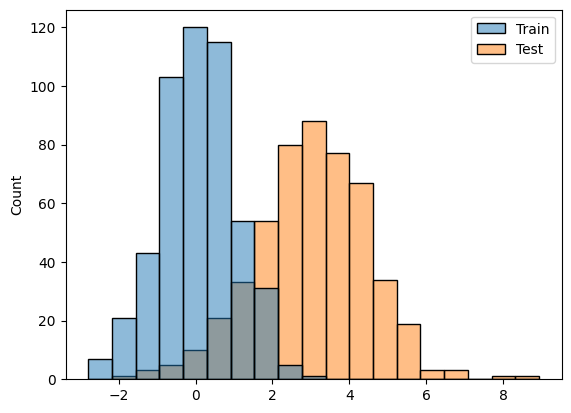

In [3]:
import seaborn as sns

# ヒストグラムとしてプロットする
sns.histplot(x = x, hue = group)

以上のような状態で、訓練データ (Train)  で学習したモデルは、テストデータ (Test) を予測しようとすると分布がズレているため、正しく予測するのは難しくなります。